In [1]:
import numpy
import pandas
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras import backend as K
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#import scikitplot as skplt
import random
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Using TensorFlow backend.


In [2]:
monoH_600_data = numpy.loadtxt('monoH_2HDM_MZp-600_MA0-300_1to50.txt', delimiter=',')
monoH_800_data = numpy.loadtxt('monoH_2HDM_MZp-800_MA0-300_1to50.txt', delimiter=',')
monoH_1200_data = numpy.loadtxt('monoH_2HDM_MZp-1200_MA0-300_1to50.txt', delimiter=',')
monoH_1400_data = numpy.loadtxt('monoH_2HDM_MZp-1400_MA0-300_1to50.txt', delimiter=',')
monoH_2000_data = numpy.loadtxt('monoH_2HDM_MZp-2000_MA0-300_1to50.txt', delimiter=',')
monoH_2500_data = numpy.loadtxt('monoH_2HDM_MZp-2500_MA0-300_1to50.txt', delimiter=',')

WW_data = numpy.loadtxt('WWTo2L2Nu_0to0_2HDM.txt', delimiter=',')
top_data = numpy.loadtxt('TTTo2L2Nu_0to1_2HDM.txt', delimiter=',')

In [3]:
# Add mass

monoH_600_data[:,16] = 600
monoH_800_data[:,16] = 800
monoH_1200_data[:,16] = 1200
monoH_1400_data[:,16] = 1400
monoH_2000_data[:,16] = 2000
monoH_2500_data[:,16] = 2500


In [4]:
list_masses = [600, 800, 1200, 1400 ,2000, 2500]

for i in range(0,WW_data.shape[0]):
    WW_data[i,16] = random.choices(list_masses, k=1)[0]
    top_data[i,16] = random.choices(list_masses, k=1)[0]



In [5]:
monoH_600_data = numpy.insert(arr=monoH_600_data, obj=monoH_600_data.shape[1], values=numpy.ones(monoH_600_data.shape[0]), axis=1)
monoH_800_data = numpy.insert(arr=monoH_800_data, obj=monoH_800_data.shape[1], values=numpy.ones(monoH_800_data.shape[0]), axis=1)
monoH_1200_data = numpy.insert(arr=monoH_1200_data, obj=monoH_1200_data.shape[1], values=numpy.ones(monoH_1200_data.shape[0]), axis=1)
monoH_1400_data = numpy.insert(arr=monoH_1400_data, obj=monoH_1400_data.shape[1], values=numpy.ones(monoH_1400_data.shape[0]), axis=1)
monoH_2000_data = numpy.insert(arr=monoH_2000_data, obj=monoH_2000_data.shape[1], values=numpy.ones(monoH_2000_data.shape[0]), axis=1)
monoH_2500_data = numpy.insert(arr=monoH_2500_data, obj=monoH_2500_data.shape[1], values=numpy.ones(monoH_2500_data.shape[0]), axis=1)


WW_data = numpy.insert(arr=WW_data, obj=WW_data.shape[1], values=numpy.zeros(WW_data.shape[0]), axis=1)
top_data = numpy.insert(arr=top_data, obj=top_data.shape[1], values=numpy.zeros(top_data.shape[0]), axis=1)

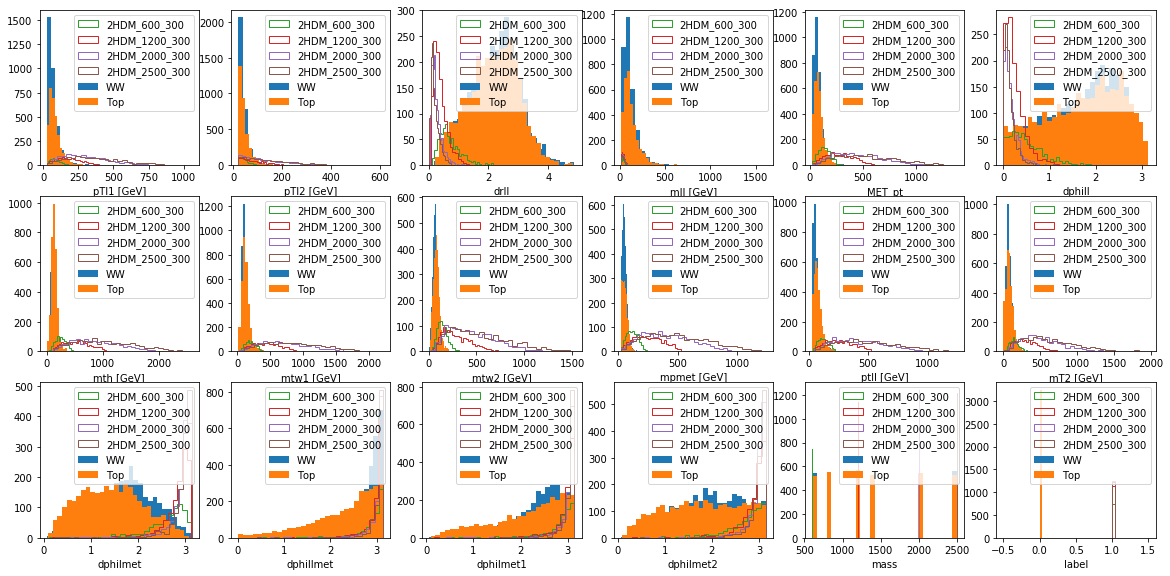

In [94]:
# VARIABLES:

variable = ['pTl1 [GeV]', 'pTl2 [GeV]', 'drll', 'mll [GeV]', 'MET_pt', 'dphill', 'mth [GeV]', 'mtw1 [GeV]', 'mtw2 [GeV]', 'mpmet [GeV]', 'ptll [GeV]', 'mT2 [GeV]', 'dphilmet', 'dphillmet', 'dphilmet1', 'dphilmet2', 'mass', 'label']
plt.figure(figsize=(20,20))

for i in numpy.arange(monoH_600_data.shape[1]):
    plt.subplot(6,6,i+1) 
    plt.hist(WW_data[:,i], bins=30)
    plt.hist(top_data[:,i], bins=30)
    plt.hist(monoH_600_data[:,i], bins=30, histtype='step')
    plt.hist(monoH_1200_data[:,i], bins=30, histtype='step')
    plt.hist(monoH_2000_data[:,i], bins=30, histtype='step')
    plt.hist(monoH_2500_data[:,i], bins=30, histtype='step')
    plt.xlabel(variable[i])
    plt.legend(['2HDM_600_300', '2HDM_1200_300', '2HDM_2000_300', '2HDM_2500_300','WW', 'Top',], loc='upper right')


plt.savefig('input_var_2HDM.png');  
plt.show();





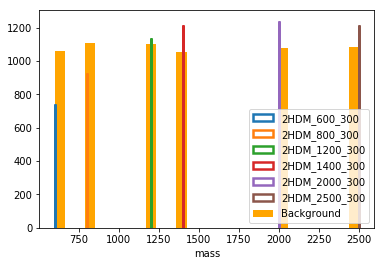

In [104]:
allbackground = numpy.concatenate((WW_data, top_data))



plt.hist(allbackground[:,monoH_600_data.shape[1]-2], bins=30, color='orange')
plt.hist(monoH_600_data[:,monoH_600_data.shape[1]-2], bins=30, histtype='step',  linewidth=2.5)
plt.hist(monoH_800_data[:,monoH_600_data.shape[1]-2], bins=30, histtype='step',  linewidth=2.5)
plt.hist(monoH_1200_data[:,monoH_600_data.shape[1]-2], bins=30, histtype='step',  linewidth=2.5)
plt.hist(monoH_1400_data[:,monoH_600_data.shape[1]-2], bins=30, histtype='step',  linewidth=2.5)
plt.hist(monoH_2000_data[:,monoH_600_data.shape[1]-2], bins=30, histtype='step',  linewidth=2.5)
plt.hist(monoH_2500_data[:,monoH_600_data.shape[1]-2], bins=30, histtype='step',  linewidth=2.5)
plt.xlabel(variable[monoH_600_data.shape[1]-2])
plt.legend(['2HDM_600_300', '2HDM_800_300', '2HDM_1200_300', '2HDM_1400_300', '2HDM_2000_300', '2HDM_2500_300','Background',], loc='lower right')




plt.savefig('mass_2HDM.png'); 

In [7]:
# concatenate

alldata = numpy.concatenate((monoH_600_data, monoH_800_data, monoH_1200_data, monoH_1400_data, monoH_2000_data, monoH_2500_data, WW_data, top_data))

# Random rows
alldata = numpy.take(alldata,numpy.random.permutation(alldata.shape[0]),axis=0,out=alldata)



alldata_oneMass = numpy.concatenate((monoH_600_data, WW_data, top_data))

# Random rows
alldata_oneMass = numpy.take(alldata,numpy.random.permutation(alldata_oneMass.shape[0]),axis=0,out=alldata_oneMass)

In [56]:
alldata.shape

(12964, 18)

In [8]:
X = alldata[:,:17]
Y = alldata[:,17]


X_oneMass = alldata_oneMass[:,:17]
Y_oneMass = alldata_oneMass[:,17]

In [9]:
for j in range(0,X.shape[1]-2):
    mean = numpy.mean(X[:,j])
    std = numpy.std(X[:,j])
    for i in range(0,X.shape[0]):
        X[i,j] = X[i,j] - mean
        X[i,j] = X[i,j] / std
        
        
for j in range(0,X_oneMass.shape[1]-2):
    mean = numpy.mean(X_oneMass[:,j])
    std = numpy.std(X_oneMass[:,j])
    for i in range(0,X_oneMass.shape[0]):
        X_oneMass[i,j] = X_oneMass[i,j] - mean
        X_oneMass[i,j] = X_oneMass[i,j] / std



In [10]:
# fraction of the data to assign to the test set
test_size = 0.2

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=test_size, random_state=0)

print('Size of X_train is: '+str(X_train.shape))
print('Size of X_test is: '+str(X_test.shape))



X_noMass = alldata[:,:16]
X_train_noMass, X_test_noMass, Y_train_noMass, Y_test_noMass = train_test_split(
    X_noMass, Y, test_size=test_size, random_state=0)

print('Size of X_train_noMass is: '+str(X_train_noMass.shape))
print('Size of X_test_noMass is: '+str(X_test_noMass.shape))


X_oneMass = alldata_oneMass[:,:16]
X_train_oneMass, X_test_oneMass, Y_train_oneMass, Y_test_oneMass = train_test_split(
    X_oneMass, Y_oneMass, test_size=test_size, random_state=0)

print('Size of X_train_900 is: '+str(X_train_oneMass.shape))
print('Size of X_test_900 is: '+str(X_test_oneMass.shape))



Size of X_train is: (10371, 17)
Size of X_test is: (2593, 17)
Size of X_train_noMass is: (10371, 16)
Size of X_test_noMass is: (2593, 16)
Size of X_train_900 is: (5780, 16)
Size of X_test_900 is: (1446, 16)


In [11]:
K.clear_session()

model = keras.models.Sequential()
model.add(keras.layers.Dense(100, input_shape=X.shape[1:], activation='relu'))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(1, activation='sigmoid'))


opt = keras.optimizers.RMSprop(lr=0.0005)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy',])



#model.summary()




Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
history = model.fit(X_train,Y_train,epochs = 20, verbose=0)
# , validation_split = 0.1

Instructions for updating:
Use tf.cast instead.


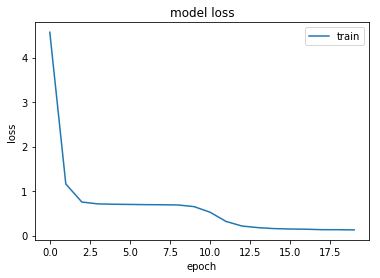

In [13]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'validation'], loc='upper right')
plt.legend(['train'], loc='upper right')
plt.show()

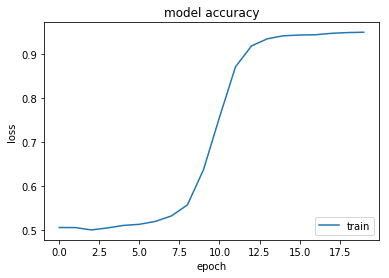

In [14]:
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'validation'], loc='lower right')
plt.legend(['train'], loc='lower right')
plt.show()

In [15]:
scores = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

2593/2593 [==============================] - 0s 175us/step
Test loss: 0.13601593580305726
Test accuracy: 0.9398380254531431


In [139]:
#K.clear_session()

model_noMass = keras.models.Sequential()
model_noMass.add(keras.layers.Dense(100, input_shape=X_noMass.shape[1:], activation='relu'))
model_noMass.add(Dropout(0.2))
model_noMass.add(keras.layers.Dense(100, activation='relu'))
model_noMass.add(Dropout(0.2))
model_noMass.add(keras.layers.Dense(100, activation='relu'))
model_noMass.add(Dropout(0.2))
model_noMass.add(keras.layers.Dense(100, activation='relu'))
model_noMass.add(Dropout(0.2))
model_noMass.add(keras.layers.Dense(100, activation='relu'))
model_noMass.add(Dropout(0.2))
model_noMass.add(keras.layers.Dense(1, activation='sigmoid'))

#model_noMass.summary()


opt = keras.optimizers.RMSprop(lr=0.0005)
model_noMass.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy',])

In [17]:
model_oneMass = keras.models.Sequential()
model_oneMass.add(keras.layers.Dense(100, input_shape=X_oneMass.shape[1:], activation='relu'))
model_oneMass.add(Dropout(0.2))
model_oneMass.add(keras.layers.Dense(100, activation='relu'))
model_oneMass.add(Dropout(0.2))
model_oneMass.add(keras.layers.Dense(100, activation='relu'))
model_oneMass.add(Dropout(0.2))
model_oneMass.add(keras.layers.Dense(100, activation='relu'))
model_oneMass.add(Dropout(0.2))
model_oneMass.add(keras.layers.Dense(100, activation='relu'))
model_oneMass.add(Dropout(0.2))
model_oneMass.add(keras.layers.Dense(1, activation='sigmoid'))

#model_noMass.summary()


opt = keras.optimizers.RMSprop(lr=0.0005)
model_oneMass.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy',])

In [140]:
history_noMass = model_noMass.fit(X_train[:,:16],Y_train,epochs = 20, verbose=1) #exlude the mass column
#  validation_split = 0.1

Epoch 1/20
10371/10371 [==============================] - 6s 539us/step - loss: 0.1609 - acc: 0.9368
Epoch 2/20
10371/10371 [==============================] - 3s 336us/step - loss: 0.1108 - acc: 0.9554
Epoch 3/20
10371/10371 [==============================] - 3s 316us/step - loss: 0.1098 - acc: 0.9569
Epoch 4/20
10371/10371 [==============================] - 3s 333us/step - loss: 0.1067 - acc: 0.9570
Epoch 5/20
10371/10371 [==============================] - 3s 335us/step - loss: 0.1047 - acc: 0.9588
Epoch 6/20
10371/10371 [==============================] - 3s 318us/step - loss: 0.1030 - acc: 0.9618
Epoch 7/20
10371/10371 [==============================] - 3s 336us/step - loss: 0.1066 - acc: 0.9604
Epoch 8/20
10371/10371 [==============================] - 3s 315us/step - loss: 0.1040 - acc: 0.9586
Epoch 9/20
10371/10371 [==============================] - 3s 333us/step - loss: 0.1030 - acc: 0.9613
Epoch 10/20
10371/10371 [==============================] - 3s 334us/step - loss: 0.1021 - a

In [19]:
history_oneMass = model_oneMass.fit(X_train_oneMass[:,:16],Y_train_oneMass,epochs = 20, verbose=0) #exlude the mass column

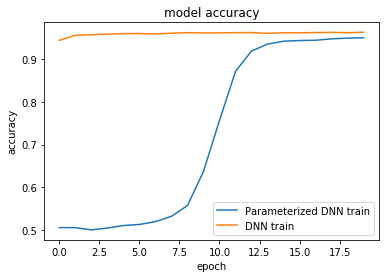

In [70]:
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.plot(history_noMass.history['acc'])
#plt.plot(history_noMass.history['val_acc'])



plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['parDNN train', 'parDNN validation', 'DNN train', 'DNN validation'], loc='lower right')
plt.legend(['Parameterized DNN train', 'DNN train'], loc='lower right')
plt.savefig('loss_2HDM.png');
plt.show()

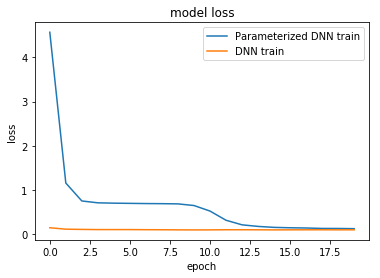

In [136]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.plot(history_noMass.history['loss'])
#plt.plot(history_noMass.history['val_loss'])



plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['parDNN train', 'parDNN validation', 'DNN train', 'DNN validation'], loc='upper right')
plt.legend(['Parameterized DNN train', 'DNN train'], loc='upper right')
plt.savefig('acc_2HDM.png');
plt.show()

In [22]:
Y_pred = model.predict_proba(X_test)
roc_auc_score(Y_test, Y_pred)

0.9917068265924155

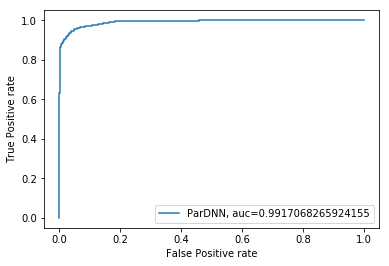

In [23]:
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test,  y_pred_proba)
auc = roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="ParDNN, auc="+str(auc))
plt.legend(loc=4)
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()
#roc_curve(Y_test, Y_pred)

In [24]:
Y_pred = model.predict(X_test)
Y_pred_noMass = model_noMass.predict(X_test_noMass)

In [25]:
rf = RandomForestClassifier(max_depth=2, min_samples_leaf=442, min_samples_split = 442, n_estimators=500)

rf.fit(X_train[:,:16],Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=442, min_samples_split=442,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [108]:
bdt7 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=int(X_train[:,:16].shape[0]*0.05)), n_estimators=500, learning_rate=0.1)

In [109]:
bdt7.fit(X_train[:,:16],Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=518,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                           

In [26]:
X_test_600 = X_test[X_test[:,16]==600]
X_test_800 = X_test[X_test[:,16]==800]
X_test_1200 = X_test[X_test[:,16]==1200]
X_test_1400 = X_test[X_test[:,16]==1400]
X_test_2000 = X_test[X_test[:,16]==2000]
X_test_2500 = X_test[X_test[:,16]==2500]

X_test_600_noMass = X_test_600[:,:16]
X_test_800_noMass = X_test_800[:,:16]
X_test_1200_noMass = X_test_1200[:,:16]
X_test_1400_noMass = X_test_1400[:,:16]
X_test_2000_noMass = X_test_2000[:,:16]
X_test_2500_noMass = X_test_2500[:,:16]

Y_test_600 = Y_test[X_test[:,16]==600]
Y_test_800 = Y_test[X_test[:,16]==800]
Y_test_1200 = Y_test[X_test[:,16]==1200]
Y_test_1400 = Y_test[X_test[:,16]==1400]
Y_test_2000 = Y_test[X_test[:,16]==2000]
Y_test_2500 = Y_test[X_test[:,16]==2500]


In [122]:
Y_pred_600 = model.predict_proba(X_test_600)
Y_pred_800 = model.predict_proba(X_test_800)
Y_pred_1200 = model.predict_proba(X_test_1200)
Y_pred_1400 = model.predict_proba(X_test_1400)
Y_pred_2000 = model.predict_proba(X_test_2000)
Y_pred_2500 = model.predict_proba(X_test_2500)

Y_pred_600_noMass = model_noMass.predict_proba(X_test_600_noMass)
Y_pred_800_noMass = model_noMass.predict_proba(X_test_800_noMass)
Y_pred_1200_noMass = model_noMass.predict_proba(X_test_1200_noMass)
Y_pred_1400_noMass = model_noMass.predict_proba(X_test_1400_noMass)
Y_pred_2000_noMass = model_noMass.predict_proba(X_test_2000_noMass)
Y_pred_2500_noMass = model_noMass.predict_proba(X_test_2500_noMass)


Y_pred_600_oneMass = model_oneMass.predict_proba(X_test_600_noMass)
Y_pred_800_oneMass = model_oneMass.predict_proba(X_test_800_noMass)
Y_pred_1200_oneMass = model_oneMass.predict_proba(X_test_1200_noMass)
Y_pred_1400_oneMass = model_oneMass.predict_proba(X_test_1400_noMass)
Y_pred_2000_oneMass = model_oneMass.predict_proba(X_test_2000_noMass)
Y_pred_2500_oneMass = model_oneMass.predict_proba(X_test_2500_noMass)


Y_pred_600_rf = bdt.predict_proba(X_test_600_noMass)
Y_pred_800_rf = bdt.predict_proba(X_test_800_noMass)
Y_pred_1200_rf = bdt.predict_proba(X_test_1200_noMass)
Y_pred_1400_rf = bdt.predict_proba(X_test_1400_noMass)
Y_pred_2000_rf = bdt.predict_proba(X_test_2000_noMass)
Y_pred_2500_rf = bdt.predict_proba(X_test_2500_noMass)


Y_pred_600_bdt7 = bdt7.predict_proba(X_test_600_noMass)
Y_pred_800_bdt7 = bdt7.predict_proba(X_test_800_noMass)
Y_pred_1200_bdt7 = bdt7.predict_proba(X_test_1200_noMass)
Y_pred_1400_bdt7 = bdt7.predict_proba(X_test_1400_noMass)
Y_pred_2000_bdt7 = bdt7.predict_proba(X_test_2000_noMass)
Y_pred_2500_bdt7 = bdt7.predict_proba(X_test_2500_noMass)




In [123]:
auc_600 = roc_auc_score(Y_test_600, Y_pred_600)
auc_800 = roc_auc_score(Y_test_800, Y_pred_800)
auc_1200 = roc_auc_score(Y_test_1200, Y_pred_1200)
auc_1400 = roc_auc_score(Y_test_1400, Y_pred_1400)
auc_2000 = roc_auc_score(Y_test_2000, Y_pred_2000)
auc_2500 = roc_auc_score(Y_test_2500, Y_pred_2500)

auc_600_noMass = roc_auc_score(Y_test_600, Y_pred_600_noMass)
auc_800_noMass = roc_auc_score(Y_test_800, Y_pred_800_noMass)
auc_1200_noMass = roc_auc_score(Y_test_1200, Y_pred_1200_noMass)
auc_1400_noMass = roc_auc_score(Y_test_1400, Y_pred_1400_noMass)
auc_2000_noMass = roc_auc_score(Y_test_2000, Y_pred_2000_noMass)
auc_2500_noMass = roc_auc_score(Y_test_2500, Y_pred_2500_noMass)

auc_600_oneMass = roc_auc_score(Y_test_600, Y_pred_600_oneMass)
auc_800_oneMass = roc_auc_score(Y_test_800, Y_pred_800_oneMass)
auc_1200_oneMass = roc_auc_score(Y_test_1200, Y_pred_1200_oneMass)
auc_1400_oneMass = roc_auc_score(Y_test_1400, Y_pred_1400_oneMass)
auc_2000_oneMass = roc_auc_score(Y_test_2000, Y_pred_2000_oneMass)
auc_2500_oneMass = roc_auc_score(Y_test_2500, Y_pred_2500_oneMass)

auc_600_rf = roc_auc_score(Y_test_600, Y_pred_600_rf[:,1])
auc_800_rf = roc_auc_score(Y_test_800, Y_pred_800_rf[:,1])
auc_1200_rf = roc_auc_score(Y_test_1200, Y_pred_1200_rf[:,1])
auc_1400_rf = roc_auc_score(Y_test_1400, Y_pred_1400_rf[:,1])
auc_2000_rf = roc_auc_score(Y_test_2000, Y_pred_2000_rf[:,1])
auc_2500_rf = roc_auc_score(Y_test_2500, Y_pred_2500_rf[:,1])

auc_600_bdt7 = roc_auc_score(Y_test_600, Y_pred_600_bdt7[:,1])
auc_800_bdt7 = roc_auc_score(Y_test_800, Y_pred_800_bdt7[:,1])
auc_1200_bdt7 = roc_auc_score(Y_test_1200, Y_pred_1200_bdt7[:,1])
auc_1400_bdt7 = roc_auc_score(Y_test_1400, Y_pred_1400_bdt7[:,1])
auc_2000_bdt7 = roc_auc_score(Y_test_2000, Y_pred_2000_bdt7[:,1])
auc_2500_bdt7 = roc_auc_score(Y_test_2500, Y_pred_2500_bdt7[:,1])




In [142]:
auc = numpy.array([auc_600, auc_800, auc_1200, auc_1400, auc_2000, auc_2500])
masses = numpy.array([600,800,1200,1400,2000,2500])
auc_masses = numpy.column_stack((auc, masses))


auc_noMass = numpy.array([auc_600_noMass, auc_800_noMass, auc_1200_noMass, auc_1400_noMass, auc_2000_noMass, auc_2500_noMass])
masses = numpy.array([600,800,1200,1400,2000,2500])
auc_masses_noMass = numpy.column_stack((auc_noMass, masses))


auc_oneMass = numpy.array([auc_600_oneMass, auc_800_oneMass, auc_1200_oneMass, auc_1400_oneMass, auc_2000_oneMass, auc_2500_oneMass])
masses = numpy.array([600,800,1200,1400,2000,2500])
auc_masses_oneMass = numpy.column_stack((auc_oneMass, masses))

auc_rf = numpy.array([auc_600_rf, auc_800_rf, auc_1200_rf, auc_1400_rf, auc_2000_rf, auc_2500_rf])
masses = numpy.array([600,800,1200,1400,2000,2500])
auc_masses_rf = numpy.column_stack((auc_rf, masses))


auc_bdt7 = numpy.array([auc_600_bdt7, auc_800_bdt7, auc_1200_bdt7, auc_1400_bdt7, auc_2000_bdt7, auc_2500_bdt7])
masses = numpy.array([600,800,1200,1400,2000,2500])
auc_masses_bdt7 = numpy.column_stack((auc_bdt7, masses))



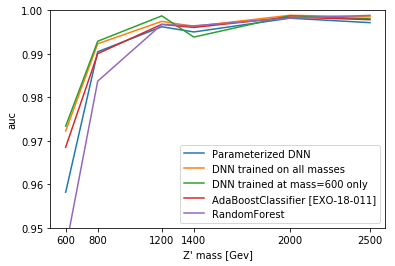

In [152]:
#plt.figure(figsize=(20,20))

plt.plot(auc_masses[:,1],auc_masses[:,0], label='DNNpar')
plt.plot(auc_masses_noMass[:,1],auc_masses_noMass[:,0], label='DNN')
plt.plot(auc_masses_oneMass[:,1],auc_masses_oneMass[:,0], label='DNN 600')
plt.plot(auc_masses_bdt7[:,1],auc_masses_bdt7[:,0], label='bdt')
plt.plot(auc_masses_rf[:,1],auc_masses_rf[:,0], label='rf')



plt.legend(loc=4)
plt.ylabel('auc')
plt.xlabel('Z\' mass [Gev]')
plt.legend(['Parameterized DNN', 'DNN trained on all masses', 'DNN trained at mass=600 only', 'AdaBoostClassifier [EXO-18-011]', 'RandomForest'], loc='lower right')
plt.ylim((0.95, 1.0))
plt.xticks(masses)
#plt.xticks(numpy.array([600,800,1000,1200,1400,1700,2000,2500]))
plt.savefig('auc_2HDM.png');

plt.show()
#roc_curve(Y_test, Y_pred)

In [145]:
print(auc_masses_bdt7)

[[9.68536641e-01 6.00000000e+02]
 [9.90048309e-01 8.00000000e+02]
 [9.96784704e-01 1.20000000e+03]
 [9.96071074e-01 1.40000000e+03]
 [9.98458998e-01 2.00000000e+03]
 [9.97852953e-01 2.50000000e+03]]


In [146]:
print(auc_masses_noMass)

[[9.72263314e-01 6.00000000e+02]
 [9.92318841e-01 8.00000000e+02]
 [9.97470634e-01 1.20000000e+03]
 [9.96324909e-01 1.40000000e+03]
 [9.98862594e-01 2.00000000e+03]
 [9.98498813e-01 2.50000000e+03]]


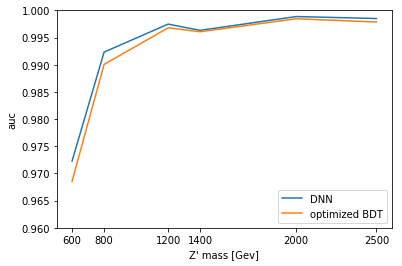

In [151]:
plt.plot(auc_masses_noMass[:,1],auc_masses_noMass[:,0], label='DNN')
plt.plot(auc_masses_bdt7[:,1],auc_masses_bdt7[:,0], label='bdt')



plt.legend(loc=4)
plt.ylabel('auc')
plt.xlabel('Z\' mass [Gev]')
plt.legend(['DNN', 'optimized BDT'], loc='lower right')
plt.ylim((0.96, 1.0))
plt.xticks(masses)
#plt.xticks(numpy.array([600,800,1000,1200,1400,1700,2000,2500]))
plt.savefig('auc_2HDM_DNN.png');

plt.show()
#roc_curve(Y_test, Y_pred)